In [1]:
import pandas as pd
df = pd.read_csv("Dataset .csv")

In [2]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df['Has Table booking'].value_counts(normalize = True)*100

Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

In [9]:
df['Has Online delivery'].value_counts(normalize = True)*100

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

In [10]:
df.groupby('Has Table booking')['Aggregate rating'].mean()

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

### Impact of Table Booking on Ratings
Restaurants that offer table booking have a higher average aggregate rating compared to those that do not. This suggests that the availability of table booking may enhance customer satisfaction and overall dining experience.

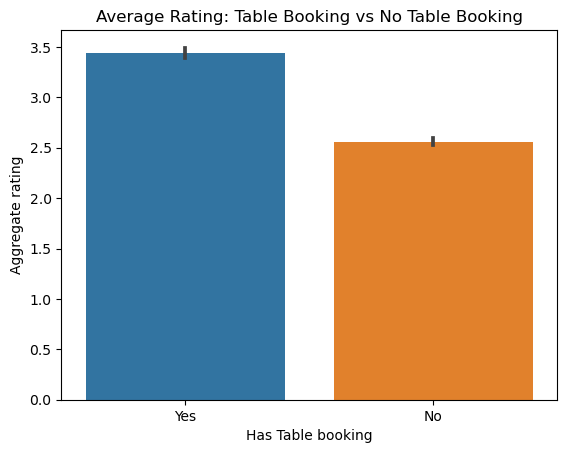

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title("Average Rating: Table Booking vs No Table Booking")
plt.show()

In [33]:
delivery_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
delivery_price

,Price range,Has Online delivery,percentage
0,1,No,84.225923
1,1,Yes,15.774077
2,2,No,58.689367
3,2,Yes,41.310633
4,3,No,70.809659
5,3,Yes,29.190341
6,4,No,90.955631
7,4,Yes,9.044369


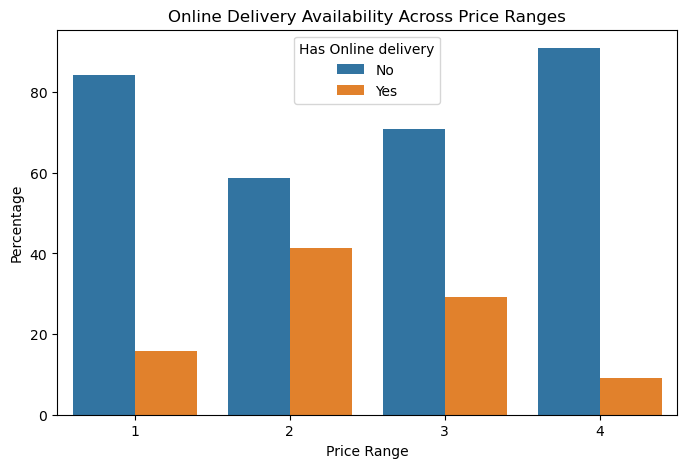

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Price range',
    y='percentage',
    hue='Has Online delivery',
    data=delivery_price
)
plt.title("Online Delivery Availability Across Price Ranges")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.show()

### Online Delivery vs Price Range
Online delivery availability varies significantly across price ranges. Mid-priced restaurants (Price Range 2 and 3) are more likely to offer online delivery, while low and high price range restaurants show lower availability. This suggests that online delivery services are most common among moderately priced restaurants targeting higher order volumes.

In [40]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [43]:
avg = df.groupby('Price range')['Aggregate rating'].mean()
avg

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

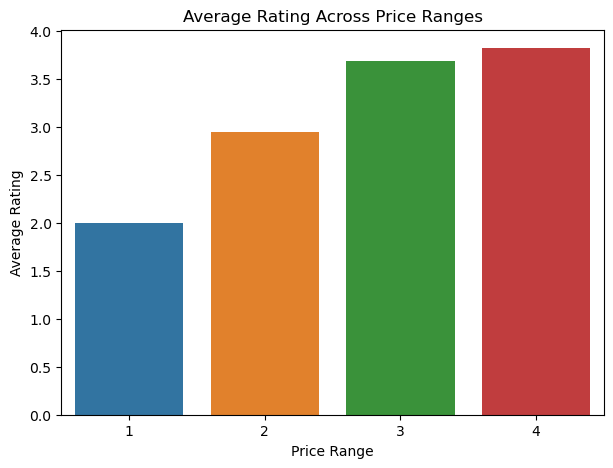

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x=avg.index, y=avg.values)
plt.title("Average Rating Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

In [46]:
avg.idxmax()

4

In [49]:
df[df['Price range'] == avg.idxmax()]['Rating color'].mode()

0    Yellow
Name: Rating color, dtype: object

In [51]:
df['Restaurant_Name_Length'] = df['Restaurant Name'].apply(len)
df['Address_Length'] = df['Address'].apply(len)

In [54]:
df['Has_Table_Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [55]:
df[['Restaurant_Name_Length', 'Address_Length', 
    'Has_Table_Booking', 'Has_Online_Delivery']].head()

,Restaurant_Name_Length,Address_Length,Has_Table_Booking,Has_Online_Delivery
0,16,71,1,0
1,16,67,1,0
2,22,56,1,0
3,4,70,0,0
4,11,64,1,0
